In [ ]:
%matplotlib inline


# create wordcloud with chinese

Wordcloud is a very good tool, but if you want to create
Chinese wordcloud only wordcloud is not enough. The file
shows how to use wordcloud with Chinese. First, you need a
Chinese word segmentation library jieba, jieba is now the
most elegant the most popular Chinese word segmentation tool in python.
You can use 'PIP install jieba'. To install it. As you can see,
at the same time using wordcloud with jieba very convenient


In [4]:

"""
create chinese wordcloud using frequency
=============================
"""


import jieba
import multidict as multidict
import numpy as np
import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random


# use jieba, 参数为整个文档， 输出中文词语列表
def jieba_processing_txt(text):
    # if you want use wordCloud,you need it add userdict by add_word()
    userdict_list = ['哈哈哈'] # 特殊不分割的词语
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    # [i for i in string if not i.isdigit()]
    # liststr = "/".join(seg_list) # 用 / 连接
    liststr = "/".join([i for i in seg_list if not i.isdigit()]) # 用 / 连接


    # 得出停用词列表, 将被忽略的停用词
    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()
        # print(f_stop_seg_list)

    # 循环分割好的词语列表，去除空格 str.strip()，如果词语是停用词则除去,除去数字，得出最后的 mywordlist
    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
        mywordlist.append(myword)



    # 以,分隔开，拼接成一个字符串 word_list
    word_list = ','.join(mywordlist)
    # print(word_list)
    return word_list




# 统计频率，参数为词语列表，输出字典 MultiDict
def getFrequencyDictForText(word_list):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in word_list.split(","):
        val = tmpDict.get(text, 0)
        tmpDict[text] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])

    #  排序
    # fullTermsDict = sorted(fullTermsDict.items(), key=lambda x: x[1], reverse = True)
    return fullTermsDict

def getFrequencyDictTF_IDF(word_list):
    pass


# 生成图像的方法 参数是 字典 MultiDict 一键多值字典
def makeImage(Dict):
    mask = np.array(Image.open(d + "/wc_cn/dog.jpg"))
    # Chinese fonts must be set
    font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

    wc = WordCloud(font_path=font_path, max_words=800, mask= mask)
    # generate word cloud
    wc.generate_from_frequencies(Dict)

    # 改变字体颜色
    default_colors = wc.to_array()
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
               interpolation="bilinear")

    wc.to_file('wordcloud.jpg')

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# Using the recolor method and custom coloring functions.
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

<MultiDict('{': 3, '
': 109, ' ': 1317, '"': 208, 'Weibo': 1, ':': 6, '-': 5, '[': 2, '会馆': 1, '有戏': 1, '': 198, '董宇辉': 2, '回应': 3, '直播': 1, '时': 1, '被': 6, '女子': 3, '泼水': 2, '岁': 2, '女': 1, '科学家': 1, '发': 1, '篇': 1, 'Science': 1, '获': 1, '百万': 1, '大奖': 1, '飞天': 1, '圆梦': 1, '你': 2, '是': 6, '踩踏': 9, '事故': 11, '中夜': 1, '店老板': 1, '会': 5, '开门': 1, '吗': 4, '欢乐颂': 1, '全员': 1, '为': 5, '乔欣': 1, '新剧': 2, '打': 1, 'call': 1, '小伙': 1, '每天': 1, '斤': 1, '白酒': 1, '患上': 1, '精神分裂症': 1, '双': 2, '必冲': 1, '鲜奶': 1, '抢单': 1, '秘籍': 1, '在': 9, '韩': 1, '留学生': 1, '爬': 1, '上': 1, '商家': 1, '备用': 1, '凳子': 1, '脱险': 1, '遭': 1, '黄鼠狼': 1, '拦路': 1, '咬': 1, '裤腿': 1, '不': 5, '放': 1, '研究': 1, '称': 5, '大脑': 2, '只': 2, '剩': 1, '一半': 1, '也': 2, '能': 2, '识字': 1, '辨人': 1, '上海': 2, '迪士尼': 4, '月': 6, '日起': 2, '暂时': 2, '关闭': 2, '孙笑川': 1, '女孩': 2, '跪地': 1, '哭喊': 2, '男朋友': 1, '了': 5, '罗志祥': 1, '新歌': 1, '供销社': 1, '太空': 1, '厨房': 1, '让': 1, '航天员': 1, '吃': 2, '好喝': 1, '好': 1, '广汽': 1, '菲克': 1, '申请': 1, '破产': 1, '梨泰院': 5, '大规模': 1, '伤亡'

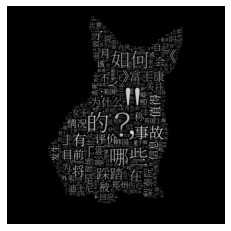

In [5]:

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 间隔词
stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'

# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# Read the whole text. 导入整个文档
text = open(path.join(d, d + '/wc_cn/CalltoArms.txt'),encoding="utf_8").read()
text1 = open(path.join(d, d + '/wc_cn/hotword.txt'),encoding="utf_8").read()


# jieba生成词语列表
word_list = jieba_processing_txt(text1)

# 生成频率dict
FrequencyDict = getFrequencyDictForText(word_list)
print((FrequencyDict))

# 生成wordcloud
makeImage(FrequencyDict)